In [18]:
# Import libraries

# Pandas
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.svm import SVC
import sklearn as skl
import tensorflow as tf

In [19]:
file = 'clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)

In [20]:
clean_df = clean_df.sample(30000)

In [21]:
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
30916,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
562131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1222000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
211197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [22]:
Counter(clean_df.ICU)

Counter({0: 29466, 1: 534})

In [23]:
y= clean_df['ICU']
X = clean_df.drop(columns = ['ICU','intubation','death'])

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [25]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled_s, y_resampled_s = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
Counter(y_resampled_s)

Counter({0: 22099, 1: 22099})

In [10]:
keep_col = ['gender',
         'pneumonia', 'new_age',
       'pregnant', 'diabetes', 'copd',
       'asthma', 'immunosup', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco']

In [11]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
sc = "balanced_accuracy"

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(clf,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Decision Tree",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.9123254324000263 [0.9007694  0.913319   0.91411112 0.91411112 0.91931651]
Balanced Accuracy 0.9123252906729871 [0.9007694  0.91332166 0.91411385 0.9141077  0.91931383]
Recall 0.9350475246248784 [0.91287622 0.93684925 0.93820733 0.9443313  0.94297352]
Precision 0.8943978349709321 [0.89129474 0.89472546 0.89505506 0.89052497 0.90038894]
F1 0.9142422491637117 [0.9019564  0.91530296 0.91612333 0.91663921 0.92118934]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.912325,0.912325,0.935048,0.894398,0.914242


In [15]:
svm = SVC(kernel='linear')

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(svm,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

# print("Cross Validation Scores: ", scores)
# print("Average CV Score: ", scores.mean())
# print("Number of CV Scores used in Average: ", len(scores))

Accuracy 0.8574888395735154 [0.85562344 0.85470182 0.85605975 0.85854928 0.8625099 ]
Balanced Accuracy 0.8574885538403603 [0.85562344 0.85470144 0.85605993 0.85854897 0.86250899]
Recall 0.8604982538159073 [0.86173342 0.85129018 0.85762789 0.86128083 0.87055895]
Precision 0.8553561108218151 [0.8513302  0.8571103  0.85491877 0.8566284  0.85679287]
F1 0.8579062224324405 [0.85650022 0.85419032 0.85627119 0.85894832 0.86362106]


In [16]:
results.append({
    "name": "SVM",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.912325,0.912325,0.935048,0.894398,0.914242
1,Logistic Regression,0.858530,0.858530,0.862580,0.855655,0.859091
2,XGBoost,0.901304,0.901303,0.927760,0.881226,0.903783
3,Random Forest,0.912190,0.912189,0.934866,0.894300,0.914105
4,SVM,0.857489,0.857489,0.860498,0.855356,0.857906


In [12]:
lr = LogisticRegression(max_iter=1000,solver='lbfgs', random_state=1)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(lr,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Logistic Regression",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.8585298938152279 [0.85664177 0.85572027 0.85730452 0.85968089 0.86330203]
Balanced Accuracy 0.8585296157759853 [0.85664177 0.85572    0.85730483 0.85968045 0.86330103]
Recall 0.8625803776871571 [0.86377008 0.8533273  0.8601177  0.86354379 0.87214302]
Precision 0.8556551271937458 [0.85162874 0.85740277 0.85527797 0.85695037 0.85701579]
F1 0.8590910620431271 [0.85765644 0.85536018 0.85769101 0.86023445 0.86451323]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.912325,0.912325,0.935048,0.894398,0.914242
1,Logistic Regression,0.858530,0.858530,0.862580,0.855655,0.859091


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(xgb,  X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(xgb,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(xgb, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)

precision = cross_val_score(xgb, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)

f1 = cross_val_score(xgb, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "XGBoost",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.9013038561687352 [0.88911518 0.90358719 0.9047188  0.90290823 0.90618988]
Balanced Accuracy 0.9013034377355857 [0.88911518 0.90358967 0.9047221  0.90290569 0.90618454]
Recall 0.9277601013197568 [0.90065626 0.92553191 0.93390675 0.92532247 0.95338312]
Precision 0.8812258067192218 [0.88033621 0.88660017 0.8823781  0.88564003 0.87117452]
F1 0.9037825821794871 [0.89038031 0.90564784 0.90741148 0.90504648 0.9104268 ]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.912325,0.912325,0.935048,0.894398,0.914242
1,Logistic Regression,0.858530,0.858530,0.862580,0.855655,0.859091
2,XGBoost,0.901304,0.901303,0.927760,0.881226,0.903783


In [14]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 13, random_state = 42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(rf,  X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)

balanced_scores = cross_val_score(rf,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)

recall = cross_val_score(rf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)

precision = cross_val_score(rf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)

f1 = cross_val_score(rf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Random Forest",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.9121896499532929 [0.90031681 0.91354532 0.9138848  0.91411112 0.91909019]
Balanced Accuracy 0.9121894672486631 [0.90031681 0.91354788 0.9138875  0.91410768 0.91908746]
Recall 0.9348664369700328 [0.91264992 0.93617021 0.93775464 0.94455759 0.94319982]
Precision 0.8943002791158292 [0.89068021 0.89562581 0.89500972 0.89035836 0.89982729]
F1 0.9141049983998348 [0.90153124 0.91544931 0.91588372 0.91665752 0.9210032 ]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.912325,0.912325,0.935048,0.894398,0.914242
1,Logistic Regression,0.858530,0.858530,0.862580,0.855655,0.859091
2,XGBoost,0.901304,0.901303,0.927760,0.881226,0.903783
3,Random Forest,0.912190,0.912189,0.934866,0.894300,0.914105


In [17]:
pd.DataFrame(results).sort_values("Accuracy", ascending=False)

,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.912325,0.912325,0.935048,0.894398,0.914242
3,Random Forest,0.912190,0.912189,0.934866,0.894300,0.914105
2,XGBoost,0.901304,0.901303,0.927760,0.881226,0.903783
1,Logistic Regression,0.858530,0.858530,0.862580,0.855655,0.859091
4,SVM,0.857489,0.857489,0.860498,0.855356,0.857906


In [27]:
ml = {
    "Random Forest": RandomForestClassifier(n_estimators = 13, random_state = 42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost":  GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

}

results = []
for x in ml:
    model = ml[x]
    model.fit(X_resampled_s, y_resampled_s)
    y_pred_s = model.predict(X_test_scaled)
    accuracy = model.score(X_test_scaled, y_test)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred_s)
    #calculating precision and reall
    precision = precision_score(y_test, y_pred_s)
    recall = recall_score(y_test, y_pred_s)
    print(f'model{x}: {confusion_matrix(y_test,y_pred_s)}')
    results.append({
    "name": x,
    "Accuracy":accuracy,
    "Balanced_Accuracy":balanced_accuracy,
    "Precision": precision,
    "Recall": recall
})
pd.DataFrame(results).sort_values("Accuracy", ascending=False)

modelRandom Forest: [[6716  651]
 [  59   74]]
modelDecision Tree: [[6718  649]
 [  59   74]]
modelXGBoost: [[6595  772]
 [  42   91]]


,name,Accuracy,Balanced_Accuracy,Precision,Recall
1,Decision Tree,0.905600,0.734148,0.102351,0.556391
0,Random Forest,0.905333,0.734012,0.102069,0.556391
2,XGBoost,0.891467,0.789709,0.105446,0.684211


C:\Users\safaa\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


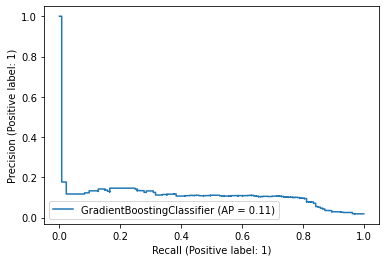

In [28]:
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(model, X_test_scaled, y_test)

In [29]:
model

GradientBoostingClassifier(learning_rate=1, max_features=5, n_estimators=20,
                           random_state=0)

In [10]:
# # Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    first_units = hp.Int('first_units', min_value=1, max_value=10, step=2)
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=first_units, activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        next_units = hp.Int('units_' + str(i), min_value=1, max_value=10, step=2)

        nn_model.add(tf.keras.layers.Dense(units=next_units, activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [11]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model, # function name
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [12]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_resampled_s, y_resampled_s,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 07s]
val_accuracy: 0.850266695022583

Best val_accuracy So Far: 0.9817333221435547
Total elapsed time: 00h 24m 32s
INFO:tensorflow:Oracle triggered exit


In [14]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 9,
 'units_2': 9,
 'units_3': 1,
 'units_4': 3,
 'units_5': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

In [15]:
best_model = tuner.get_best_models(1)[0]
fit_model = best_model.fit(X_resampled_s, y_resampled_s, epochs=50)

Epoch 1/50
1381/1381 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 2/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 3/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 4/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 5/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4939
Epoch 6/50
1381/1381 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 7/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.5011
Epoch 8/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 9/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 10/50
1381/1381 [==============================] - 3s 2ms/step - loss: 0.693

In [16]:
# Evaluate best model against full test data
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 1s - loss: 0.6965 - accuracy: 0.0183 - 582ms/epoch - 2ms/step
Loss: 0.6965357065200806, Accuracy: 0.018266666680574417


C:\Users\safaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


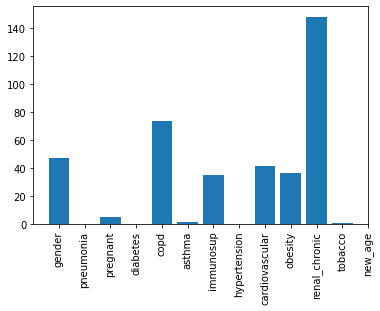

In [18]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(keep_col)), scores)
plt.xticks(range(len(keep_col)), X, rotation='vertical')
plt.show()